In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.groupby('Type').mean()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Type,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans()

In [6]:
km.fit_predict(df[['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']])

array([0, 1, 7, ..., 7, 5, 2])

In [7]:
k_range = range(1,10)
sse = []

In [8]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']])
    sse.append(km.inertia_)

In [9]:
sse

[44860.378975952,
 19290.56105271378,
 9889.828962494752,
 6340.081927459619,
 4384.82991662735,
 3432.7945039764345,
 2818.8773398609596,
 2373.00390629016,
 2021.483195630447]

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sse')

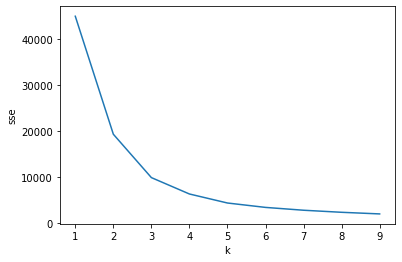

In [11]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('sse')

In [12]:
km = KMeans(n_clusters=3)

In [14]:
cluster = km.fit_predict(df[['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']])
cluster

array([2, 0, 1, ..., 1, 1, 1])

In [15]:
df['cluster'] = cluster
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,cluster
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [16]:
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]
df_2 = df[df['cluster'] == 2]

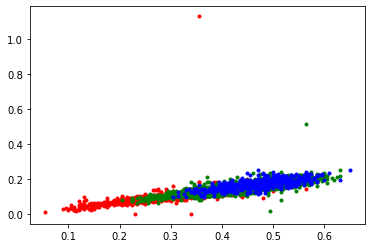

In [18]:
plt.scatter(df_0.Diameter, df_0.Height, marker='.', c='red')
plt.scatter(df_1.Diameter, df_1.Height, marker='.', c='green')
plt.scatter(df_2.Diameter, df_2.Height, marker='.', c='blue')

In [19]:
correlation = df.corr()

In [23]:
correlation['Rings']

LongestShell     0.556720
Diameter         0.574660
Height           0.557467
WholeWeight      0.540390
ShuckedWeight    0.420884
VisceraWeight    0.503819
ShellWeight      0.627574
Rings            1.000000
cluster          0.872899
Name: Rings, dtype: float64

In [25]:
correlation_df = pd.Series(correlation['Rings']).to_frame()

In [26]:
correlation_df.sort_values(by='Rings', ascending=False)

,Rings
Rings,1.000000
cluster,0.872899
ShellWeight,0.627574
Diameter,0.574660
Height,0.557467
LongestShell,0.556720
WholeWeight,0.540390
VisceraWeight,0.503819
ShuckedWeight,0.420884


In [29]:
print(df.describe())

       LongestShell     Diameter       Height  WholeWeight  ShuckedWeight  \
count   4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean       0.523992     0.407881     0.139516     0.828742       0.359367   
std        0.120093     0.099240     0.041827     0.490389       0.221963   
min        0.075000     0.055000     0.000000     0.002000       0.001000   
25%        0.450000     0.350000     0.115000     0.441500       0.186000   
50%        0.545000     0.425000     0.140000     0.799500       0.336000   
75%        0.615000     0.480000     0.165000     1.153000       0.502000   
max        0.815000     0.650000     1.130000     2.825500       1.488000   

       VisceraWeight  ShellWeight        Rings      cluster  
count    4177.000000  4177.000000  4177.000000  4177.000000  
mean        0.180594     0.238831     9.933684     0.780464  
std         0.109614     0.139203     3.224169     0.637224  
min         0.000500     0.001500     1.000000     0.00000